**Table of contents**<a id='toc0_'></a>    
- [dataset merge function](#toc1_1_1_)    
    - [Combinining Dataset](#toc1_1_2_)    
  - [cleaning up dateset](#toc1_2_)    
    - [Sort and inverse DataFrame](#toc1_2_1_)    
    - [Plot values](#toc1_2_2_)    
    - [Drop index/periodDateUTC value](#toc1_2_3_)    
    - [check the correlation between features and unemployment](#toc1_2_4_)    
    - [check for correlation between all features](#toc1_2_5_)    
      - [find most correlted feature](#toc1_2_5_1_)    
      - [Variance Inflation Factor (VIF)](#toc1_2_5_2_)    
    - [Feature Selection](#toc1_2_6_)    
      - [Combine Feature which are highly correlated with each other from above figure](#toc1_2_6_1_)    
    - [Spliting data](#toc1_2_7_)    
    - [Linear Regression](#toc1_2_8_)    
    - [Multivariate Normality and Homoscedasticity](#toc1_2_9_)    
    - [r2 score and mean squared error](#toc1_2_10_)    
    - [Linear Regression - Univeriant](#toc1_2_11_)    
    - [SVR (Support Vector Regression)](#toc1_2_12_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

from collections import Counter
from imblearn.over_sampling import SMOTE



### <a id='toc1_1_1_'></a>[dataset merge function](#toc0_)

In [138]:
def getMergedDf(final_df, df, name):
    partial_df = df[['periodDateUtc', 'actual']]
    partial_df.rename(columns={'actual': name}, inplace=True)

    # Convert to datetime
    final_df['periodDateUtc'] = pd.to_datetime(final_df['periodDateUtc'], utc=True)
    partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)

    # Get only year and month
    final_df['periodDateUtc'] = final_df['periodDateUtc'].dt.strftime('%Y-%m')
    partial_df['periodDateUtc'] = partial_df['periodDateUtc'].dt.strftime('%Y-%m')

    # Drop duplicates in partial_df based on 'periodDateUtc' column
    partial_df.drop_duplicates(subset='periodDateUtc', keep='first', inplace=True)

    # Perform the merge, avoiding duplicate rows based on 'periodDateUtc'
    merged_df = final_df.merge(partial_df, on='periodDateUtc', how='outer')

    return merged_df

### <a id='toc1_1_2_'></a>[Combinining Dataset](#toc0_)

In [139]:
# Read the JSON file into a pandas DataFrame
file_path = "./data/USD_Manufacturing_PMI.json"
ManufacturingPMI = pd.read_json(file_path)

file_path = "./data/USD_Unemployment_Rate.json"
UnemploymentRate = pd.read_json(file_path)

file_path = "./data/USD_Services_PMI.json"
ServicesPMI = pd.read_json(file_path)

file_path = "./data/USD - Industrial Production (MoM).json"
IndustrialProduction = pd.read_json(file_path)

file_path = "./data/USD - Average Hourly Earnings (MoM).json"
AverageHourlyEarnings = pd.read_json(file_path)

file_path = "./data/USD - Monthly Budget Statement.json"
MonthlyBudget = pd.read_json(file_path)

file_path = "./data/USD - OLTS Job Openings.json"
OLTSJobOpenings = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (MoM).json"
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path)

file_path = "./data/USD - Producer Price Index ex Food & Energy (YoY).json"
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales (MoM).json"
RetailSales = pd.read_json(file_path)

file_path = "./data/USD - Retail Sales Control Group.json"
RetailSalesControlGroup = pd.read_json(file_path)

file_path = "./data/USD - UoM 5-year Consumer Inflation Expectation.json"
ConsumerInflationExpectation = pd.read_json(file_path)

file_path = "./data/USD_ ISM_Manufacturing_Prices_Paid.json"
ManufacturingPricesPaid = pd.read_json(file_path)

file_path = "./data/USD_Composite_PMI.json"
CompositePMI = pd.read_json(file_path)

file_path = "./data/USD_Factory_Orders_MoM.json"
FactoryOrders = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_Employment_Index_ISM.json"
ManufacturingEmploymentIndex = pd.read_json(file_path)

file_path = "./data/USD_Manufacturing_New_Orders_Index_ISM.json"
ManufacturingNewOrdersIndex = pd.read_json(file_path)

file_path = "./data/USD_ISM_Manufacturing_PMI.json"
ISMManufacturing = pd.read_json(file_path)

file_path = "./data/USD - Interest Rate.json"
InterestRate = pd.read_json(file_path)

file_path = "./data/USD - Initial Jobless Claims.json"
InitialJoblessClaims = pd.read_json(file_path)

file_path = "./data/USD - Building Permits.json"
BuildingPermits = pd.read_json(file_path)

file_path = "./data/USD - Challenger Job Cuts.json"
JobCuts = pd.read_json(file_path)

file_path = "./data/USD - Core Personal Consumption Expenditures.json"
PersonalConsumption = pd.read_json(file_path)

file_path = "./data/USD - Gross Domestic Product Price.json"
DomesticProductPrice = pd.read_json(file_path)

file_path = "./data/USD - ISM Services PMI.json"
ISMServicesPMI = pd.read_json(file_path)


final_df = pd.DataFrame()

final_df["periodDateUtc"] = UnemploymentRate["periodDateUtc"]
final_df["unemployment"] = UnemploymentRate["actual"]

final_df = getMergedDf(final_df, ManufacturingPMI, "ManufacturingPMI")
final_df = getMergedDf(final_df, ServicesPMI, "ServicesPMI")
final_df = getMergedDf(final_df, IndustrialProduction, "IndustrialProduction")
final_df = getMergedDf(final_df, AverageHourlyEarnings, "AverageHourlyEarnings")
# final_df = getMergedDf(final_df, MonthlyBudget, "MonthlyBudget")
# final_df = getMergedDf(final_df, OLTSJobOpenings, "OLTSJobOpenings")
# final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyMoM, "ProducerPriceIndex_FoodEnergyMoM")
# final_df = getMergedDf(final_df, ProducerPriceIndex_FoodEnergyYoY, "ProducerPriceIndex_FoodEnergyYoY")
final_df = getMergedDf(final_df, RetailSales, "RetailSales")
# final_df = getMergedDf(final_df, RetailSalesControlGroup, "RetailSalesControlGroup")
# final_df = getMergedDf(final_df, ConsumerInflationExpectation, "ConsumerInflationExpectation")
final_df = getMergedDf(final_df, ManufacturingPricesPaid, "ManufacturingPricesPaid")
final_df = getMergedDf(final_df, CompositePMI, "CompositePMI")
final_df = getMergedDf(final_df, FactoryOrders, "FactoryOrders")
final_df = getMergedDf(final_df, ManufacturingEmploymentIndex, "ManufacturingEmploymentIndex")
final_df = getMergedDf(final_df, ManufacturingNewOrdersIndex, "ManufacturingNewOrdersIndex")
final_df = getMergedDf(final_df, ISMManufacturing, "ISMManufacturing")
final_df = getMergedDf(final_df, InterestRate, "InterestRate")
final_df = getMergedDf(final_df, InitialJoblessClaims, "InitialJoblessClaims")
# final_df = getMergedDf(final_df, BuildingPermits, "BuildingPermits")
# final_df = getMergedDf(final_df, JobCuts, "JobCuts")
final_df = getMergedDf(final_df, PersonalConsumption, "PersonalConsumption")
final_df = getMergedDf(final_df, DomesticProductPrice, "DomesticProductPrice")
final_df = getMergedDf(final_df, ISMServicesPMI, "ISMServicesPMI")


final_df

C:\Users\ACER\AppData\Local\Temp\ipykernel_248\2617115150.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df.rename(columns={'actual': name}, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_248\2617115150.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial_df['periodDateUtc'] = pd.to_datetime(partial_df['periodDateUtc'], utc=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_248\2617115150.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,periodDateUtc,unemployment,ManufacturingPMI,ServicesPMI,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingPricesPaid,CompositePMI,FactoryOrders,ManufacturingEmploymentIndex,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,InitialJoblessClaims,PersonalConsumption,DomesticProductPrice,ISMServicesPMI
0,2023-06,3.6,46.3,54.4,-0.5,0.4,0.2,41.8,53.2,NaN,48.1,46.0,46.0,NaN,248.0,NaN,NaN,53.9
1,2023-05,3.7,48.4,54.9,-0.2,0.3,0.3,44.2,54.3,0.3,51.4,46.9,46.9,NaN,232.0,NaN,NaN,50.3
2,2023-04,3.4,50.2,53.6,0.5,0.5,0.4,53.2,53.4,0.4,50.2,47.1,47.1,NaN,242.0,NaN,2.6,51.9
3,2023-03,3.5,49.2,52.6,0.4,0.3,-1.0,49.2,52.3,0.9,46.9,46.3,46.3,NaN,228.0,NaN,NaN,51.2
4,2023-02,3.6,47.3,50.6,0.0,0.2,-0.4,51.3,50.1,-0.7,49.1,47.7,47.7,NaN,190.0,NaN,NaN,55.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2007-01,NaN,NaN,NaN,-0.3,NaN,0.5,NaN,NaN,-5.7,NaN,NaN,NaN,NaN,NaN,NaN,1.4,NaN
199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.50,348.0,NaN,NaN,NaN
200,2006-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.25,NaN,NaN,NaN,NaN
201,2023-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,227.0,NaN,5.9,52.7


## <a id='toc1_2_'></a>[cleaning up dateset](#toc0_)

In [140]:
#remove data i fperiodDataUTC is null
final_df = final_df.dropna(subset=['periodDateUtc']);

#first fill previous value if there is not a previous value fill 0
for column in final_df.columns:
    final_df[column].fillna(method="ffill", inplace=True)
    final_df[column].fillna(0, inplace=True)
    
print(final_df.head(10))

  periodDateUtc  unemployment  ManufacturingPMI  ServicesPMI  \
0       2023-06           3.6              46.3         54.4   
1       2023-05           3.7              48.4         54.9   
2       2023-04           3.4              50.2         53.6   
3       2023-03           3.5              49.2         52.6   
4       2023-02           3.6              47.3         50.6   
5       2023-01           3.4              46.9         46.8   
6       2022-12           3.5              46.2         44.7   
7       2022-11           3.7              47.7         46.2   
8       2022-10           3.7              50.4         47.8   
9       2022-09           3.5              52.0         49.3   

   IndustrialProduction  AverageHourlyEarnings  RetailSales  \
0                  -0.5                    0.4          0.2   
1                  -0.2                    0.3          0.3   
2                   0.5                    0.5          0.4   
3                   0.4                    

C:\Users\ACER\AppData\Local\Temp\ipykernel_248\422978258.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column].fillna(method="ffill", inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_248\422978258.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[column].fillna(0, inplace=True)


### <a id='toc1_2_1_'></a>[Sort and inverse DataFrame](#toc0_)

In [141]:
# Reverse the order of the DataFrame to make it descending
final_df = final_df.iloc[::-1]

# Sort the DataFrame by 'periodDateUtc' in ascending order
final_df.sort_values(by='periodDateUtc', inplace=True)

# Reset the index if needed
final_df.reset_index(drop=True, inplace=True)

final_df

,periodDateUtc,unemployment,ManufacturingPMI,ServicesPMI,IndustrialProduction,AverageHourlyEarnings,RetailSales,ManufacturingPricesPaid,CompositePMI,FactoryOrders,ManufacturingEmploymentIndex,ManufacturingNewOrdersIndex,ISMManufacturing,InterestRate,InitialJoblessClaims,PersonalConsumption,DomesticProductPrice,ISMServicesPMI
0,2006-06,4.5,56.0,55.9,-0.3,0.30,0.5,67.0,58.6,-5.7,58.5,55.7,55.7,5.25,514.0,-4.3,1.4,50.6
1,2007-01,4.5,56.0,55.9,-0.3,0.30,0.5,67.0,58.6,-5.7,58.5,55.7,55.7,3.00,514.0,-4.3,1.4,50.6
2,2007-02,4.5,56.0,55.9,1.0,0.03,1.0,67.0,58.6,1.4,58.5,52.3,52.3,3.00,338.0,1.3,3.8,54.3
3,2007-03,4.4,56.0,55.9,-0.3,0.06,1.0,67.0,58.6,4.1,58.5,50.9,50.9,3.00,321.0,1.3,3.8,52.4
4,2007-04,4.5,56.0,55.9,-0.1,0.06,-0.1,67.0,58.6,0.5,58.5,54.7,54.7,3.00,305.0,1.3,3.8,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,2023-04,3.4,50.2,53.6,0.5,0.50,0.4,53.2,53.4,0.4,50.2,47.1,47.1,0.00,242.0,0.0,2.6,51.9
198,2023-05,3.7,48.4,54.9,-0.2,0.30,0.3,44.2,54.3,0.3,51.4,46.9,46.9,0.00,232.0,0.0,0.0,50.3
199,2023-06,3.6,46.3,54.4,-0.5,0.40,0.2,41.8,53.2,0.0,48.1,46.0,46.0,0.00,248.0,0.0,0.0,53.9
200,2023-07,4.5,56.0,55.9,-0.3,0.30,0.5,67.0,58.6,-5.7,58.5,55.7,55.7,5.25,227.0,-4.3,5.9,52.7


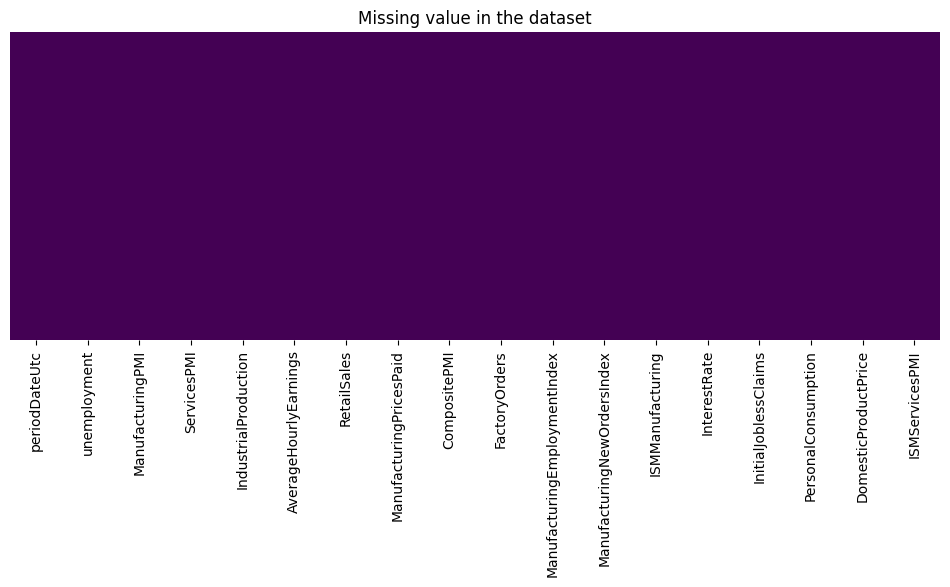

In [142]:
plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

### <a id='toc1_2_2_'></a>[Plot values](#toc0_)

In [143]:

# for column in final_df.columns:
#     plt.plot(final_df.index, final_df[column], label=column)

#     # plt.legend()
#     # plt.tight_layout()  # Optional: Adjust the layout for better spacing
#     # plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
#     plt.xlabel(column)
#     plt.ylabel('value')
#     plt.title('Line Plot')
#     plt.show()

### <a id='toc1_2_3_'></a>[Drop index/periodDateUTC value](#toc0_)

In [144]:
final_df = final_df.drop('periodDateUtc', axis=1)

### <a id='toc1_2_4_'></a>[check the correlation between features and unemployment](#toc0_)

The correlation coefficient ranges from -1 to 1:</br></br>

If the correlation coefficient is close to 1, it indicates a strong positive correlation, meaning that as one variable increases, the other tends to increase as well. </br>
If the correlation coefficient is close to -1, it indicates a strong negative correlation, meaning that as one variable increases, the other tends to decrease. </br>
If the correlation coefficient is close to 0, it indicates a weak or no linear correlation between the two variables.</br>

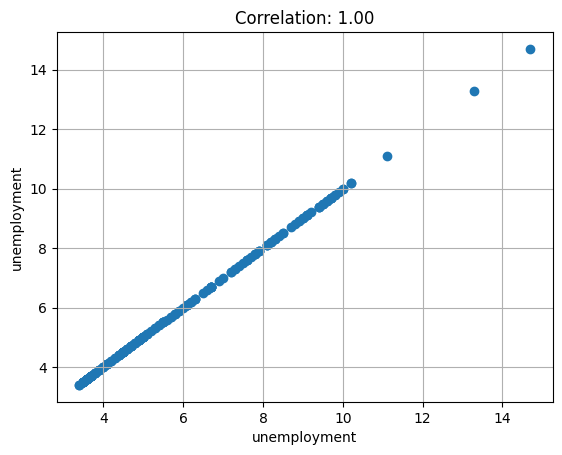

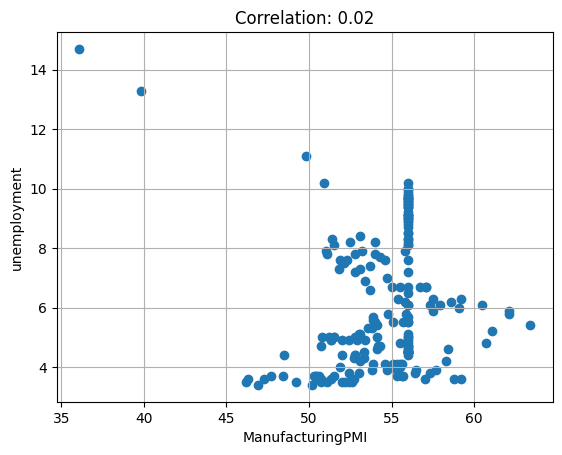

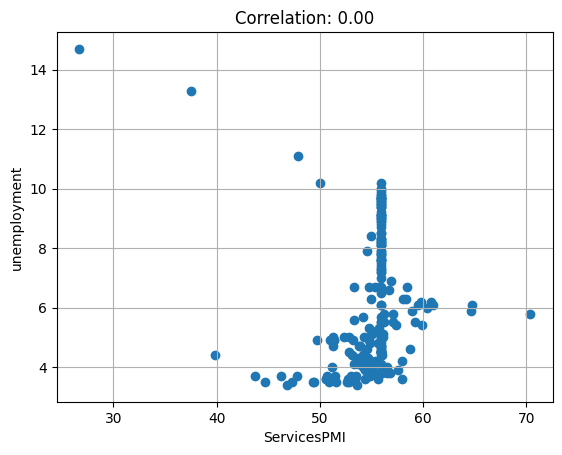

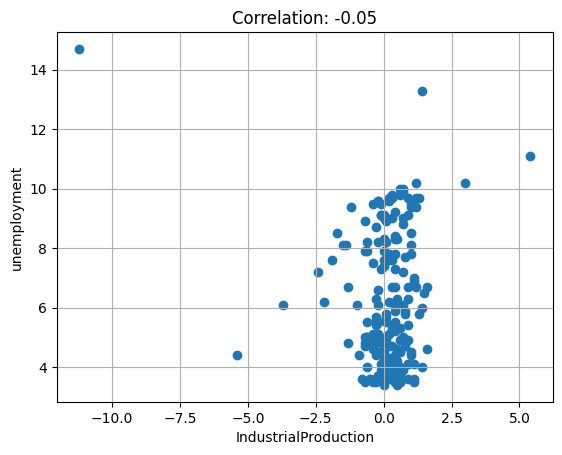

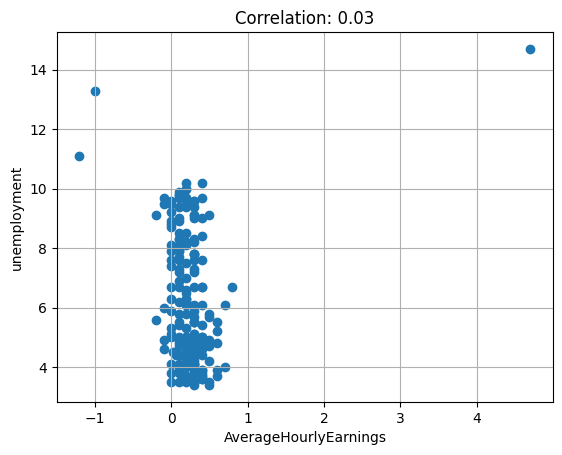

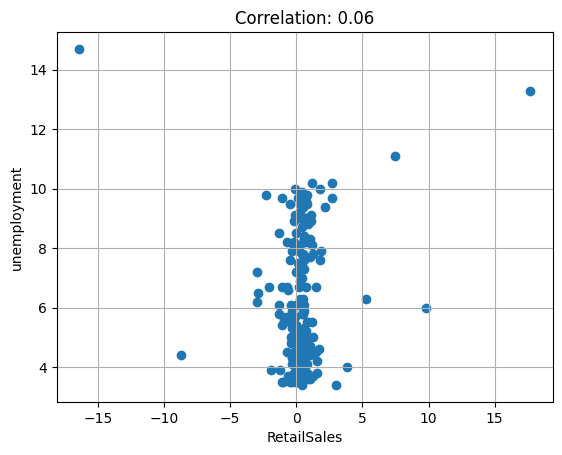

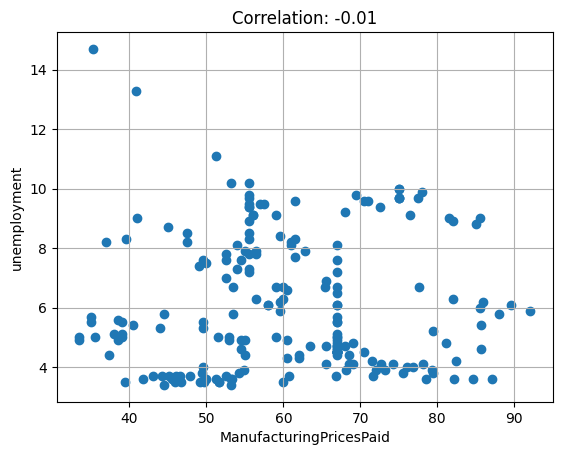

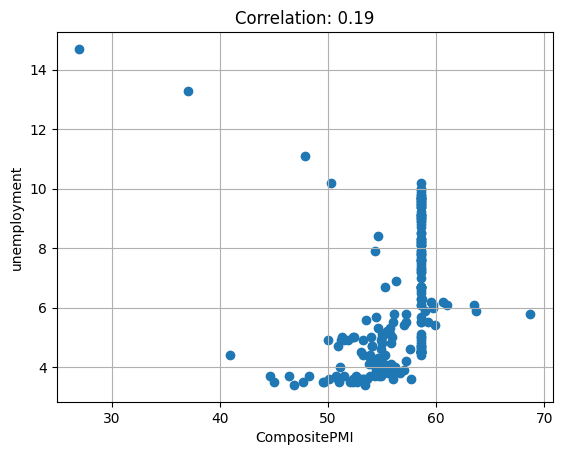

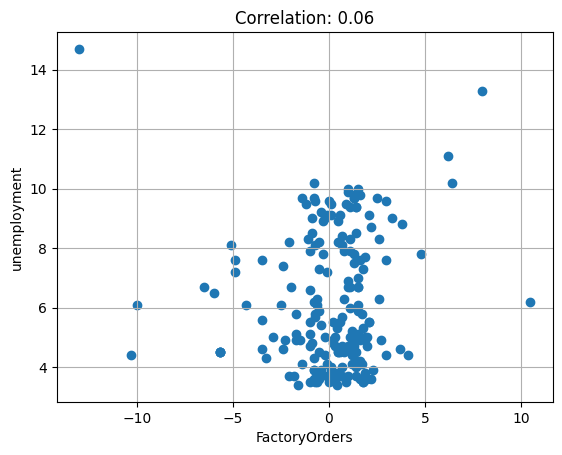

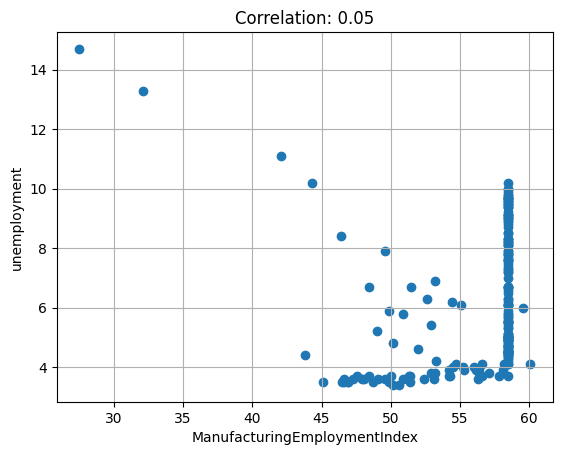

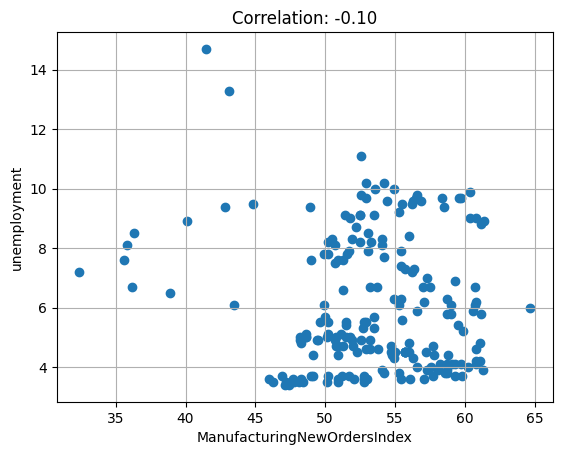

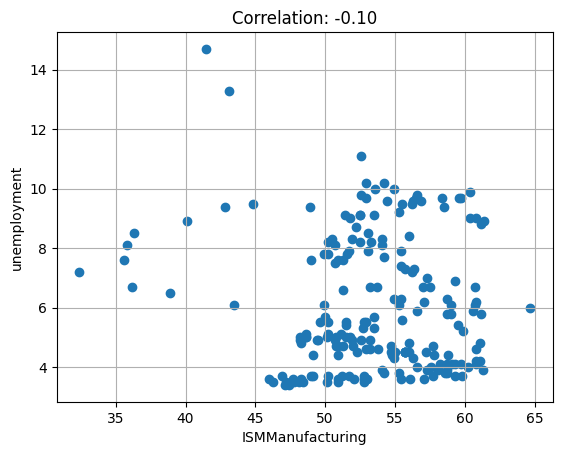

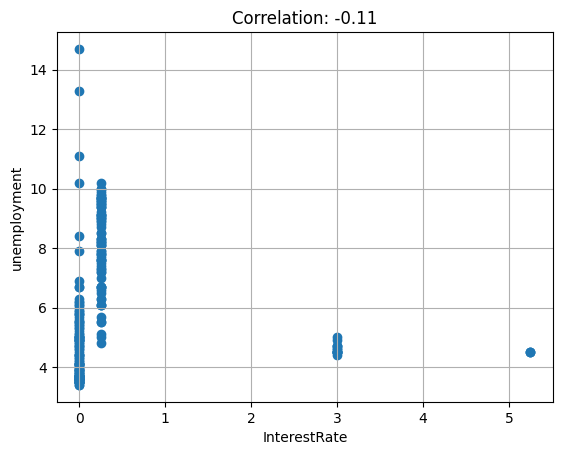

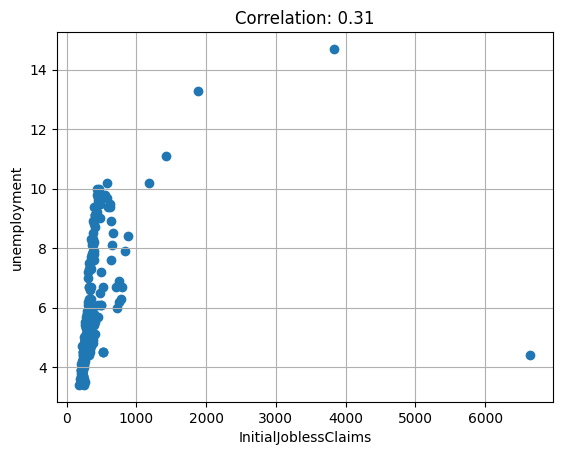

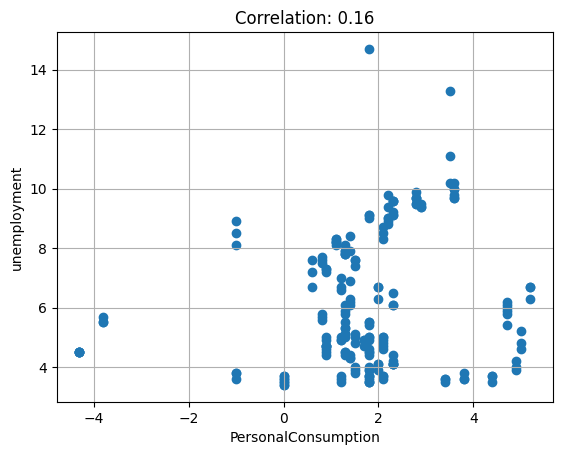

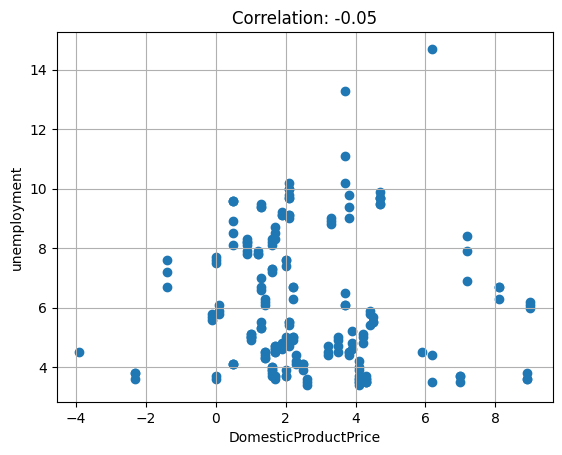

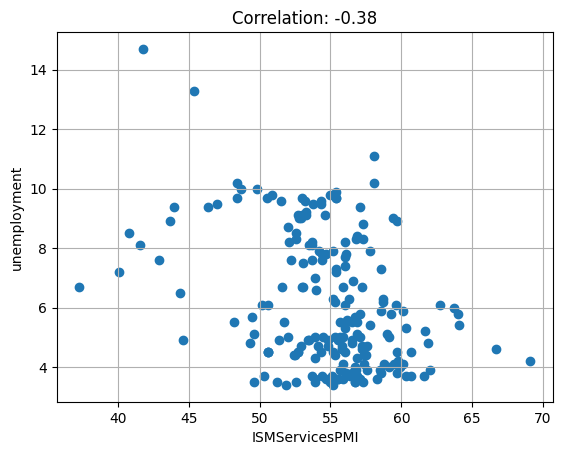

In [145]:
for column in final_df.columns:
    correlation = final_df[column].corr(final_df['unemployment'])

    # Plot a scatter plot to visualize the correlation
    plt.scatter(final_df[column], final_df['unemployment'])
    plt.xlabel(column)
    plt.ylabel('unemployment')
    plt.title(f'Correlation: {correlation:.2f}')
    plt.grid(True)
    plt.show()

### <a id='toc1_2_5_'></a>[check for correlation between all features](#toc0_)

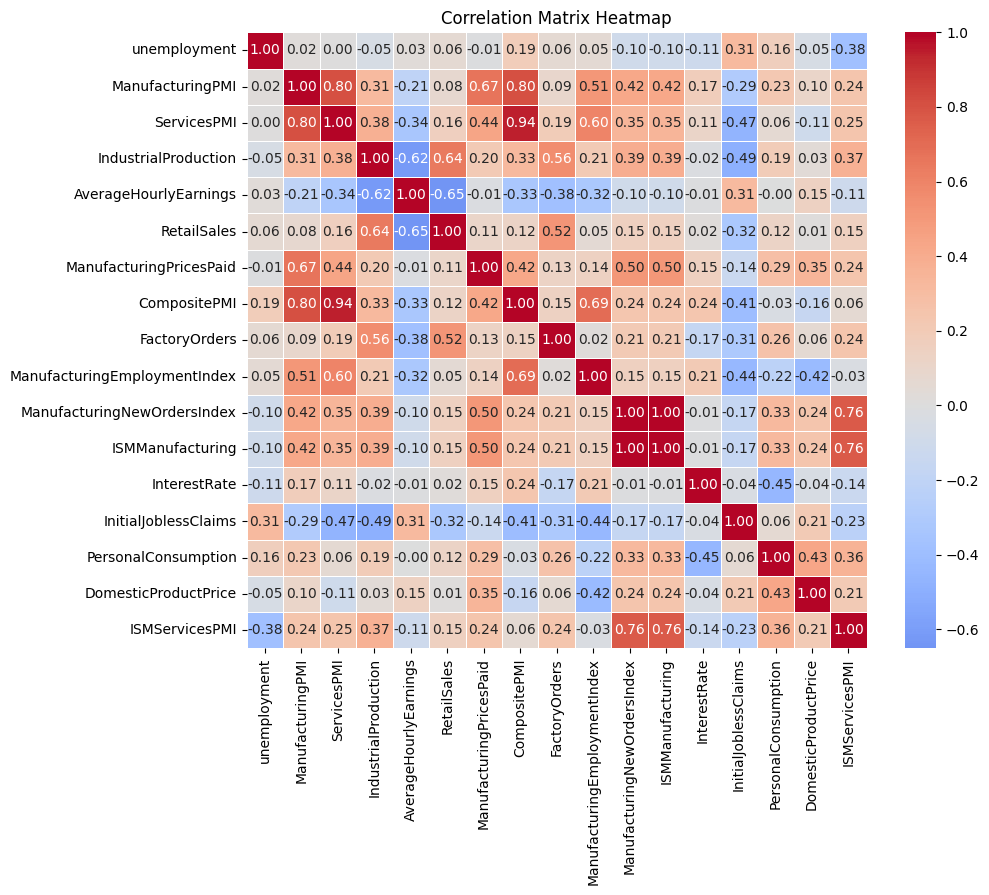

In [146]:
numeric_df = final_df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### <a id='toc1_2_5_1_'></a>[find most correlted feature](#toc0_)

In [147]:
def getMulticollinearFeatures(df, threshold): 
    numeric_df = df.select_dtypes(include='number')
    correlation_matrix = numeric_df.corr()

    # Select highly correlated features
    multicollinear_features = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) >= threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                multicollinear_features.append(colname_i)
                multicollinear_features.append(colname_j)

    return multicollinear_features;

In [148]:
def plotMulticollinearFeatures(features):
    multicollinear_features = np.array(features)
    string_counts = Counter(multicollinear_features)

    sorted_string_counts = dict(sorted(string_counts.items(), key=lambda x: x[1], reverse=False))
    plt.figure(figsize=(8, 6))
    plt.bar(sorted_string_counts.keys(), sorted_string_counts.values())
    plt.xlabel('multicollinear features')
    plt.ylabel('Frequency')
    plt.title('Distribution of Strings by Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### <a id='toc1_2_5_2_'></a>[Variance Inflation Factor (VIF)](#toc0_)

<p>VIF is a metric that quantifies the extent of multicollinearity in a feature by measuring how much the variance of an estimated regression coefficient increases when that feature is added to the model. </br>
High VIF values (>5 or 10) suggest the presence of multicollinearity.</P>

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def getVIF(df): 
    # Calculate VIF for each feature
    vif = pd.DataFrame()
    numeric_df = df.select_dtypes(include='number')
    vif['Feature'] = numeric_df.columns
    vif['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

    print(vif)

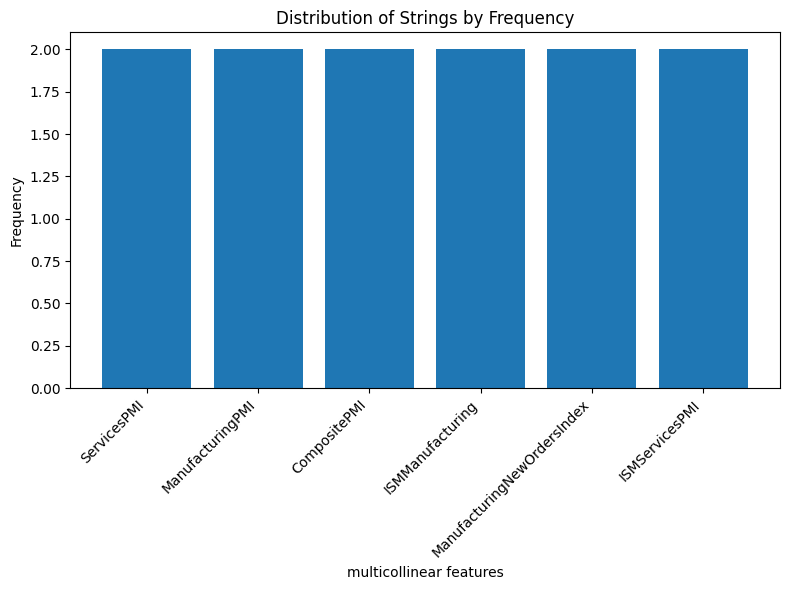

In [150]:
features = getMulticollinearFeatures(final_df, 0.7)
plotMulticollinearFeatures(features)


### <a id='toc1_2_6_'></a>[Feature Selection](#toc0_)

#### <a id='toc1_2_6_1_'></a>[Combine Feature which are highly correlated with each other from above figure](#toc0_)

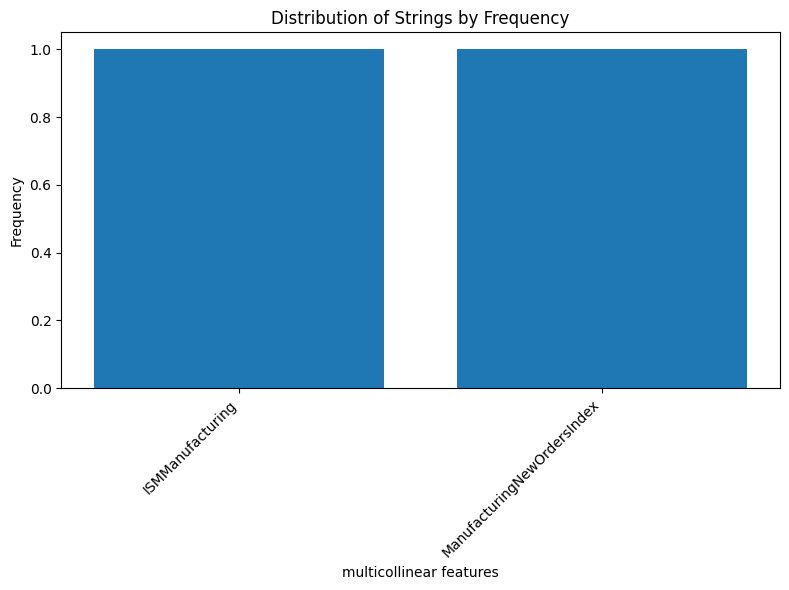

In [151]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

ManufacturingCols = ['ManufacturingPMI', 'ServicesPMI', 'CompositePMI', 'ISMServicesPMI']
#'ISMManufacturing', 'ManufacturingNewOrdersIndex', 'ManufacturingPricesPaid', 'ManufacturingEmploymentIndex',
X_std = scaler.fit_transform(final_df[ManufacturingCols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
final_df['PMI'] = X_pca

cleaned_df = final_df.drop(ManufacturingCols,axis=1) # Independet variable

features = getMulticollinearFeatures(cleaned_df, 0.7)
plotMulticollinearFeatures(features)

In [152]:
getVIF(cleaned_df);

                         Feature         VIF
0                   unemployment   11.888899
1           IndustrialProduction    2.969719
2          AverageHourlyEarnings    3.538755
3                    RetailSales    2.654804
4        ManufacturingPricesPaid   45.024186
5                  FactoryOrders    1.680744
6   ManufacturingEmploymentIndex  124.273904
7    ManufacturingNewOrdersIndex         inf
8               ISMManufacturing         inf
9                   InterestRate    1.750189
10          InitialJoblessClaims    3.397403
11           PersonalConsumption    3.850204
12          DomesticProductPrice    3.984161
13                           PMI    2.005360


c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [153]:
print(cleaned_df.describe())

       unemployment  IndustrialProduction  AverageHourlyEarnings  RetailSales  \
count    202.000000            202.000000             202.000000   202.000000   
mean       6.080198              0.096040               0.238663     0.331188   
std        2.236247              1.224942               0.380663     2.213520   
min        3.400000            -11.200000              -1.200000   -16.400000   
25%        4.300000             -0.275000               0.100000    -0.100000   
50%        5.350000              0.200000               0.200000     0.300000   
75%        7.875000              0.600000               0.300000     0.600000   
max       14.700000              5.400000               4.700000    17.700000   

       ManufacturingPricesPaid  FactoryOrders  ManufacturingEmploymentIndex  \
count               202.000000     202.000000                    202.000000   
mean                 60.641584       0.106436                     56.067327   
std                  13.221604   

### <a id='toc1_2_7_'></a>[Spliting data](#toc0_)

In [154]:
from sklearn.model_selection import train_test_split
X = cleaned_df.drop('unemployment',axis=1) # Independet variable
y = cleaned_df['unemployment'] # dependent variable

# # Initialize the SMOTE object
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE to create synthetic samples for the minority class
# X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=23)

In [155]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [156]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

### <a id='toc1_2_8_'></a>[Linear Regression](#toc0_)

In [157]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,2.481239e+17,2.815959
1,theta_1,IndustrialProduction,-1.970601e+16,0.145496
2,theta_2,AverageHourlyEarnings,-1.093484e+17,1.567529
3,theta_3,RetailSales,7.334521e-02,0.262790
4,theta_4,ManufacturingPricesPaid,1.769745e+00,0.003210
5,theta_5,FactoryOrders,1.404893e-02,0.117621
6,theta_6,ManufacturingEmploymentIndex,1.018912e+00,0.121892
7,theta_7,ManufacturingNewOrdersIndex,9.061260e+15,-0.049060
8,theta_8,ISMManufacturing,-9.061260e+15,-0.049060
9,theta_9,InterestRate,-1.432385e+00,-0.238361


In [158]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  4.899270133562086e+34
R square obtain for normal equation method is : -1.366157526968625e+34


In [159]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  2.6346979532732795
R square obtain for scikit learn library is : 0.26531659981440625


C:\Users\ACER\AppData\Local\Temp\ipykernel_248\3006966529.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


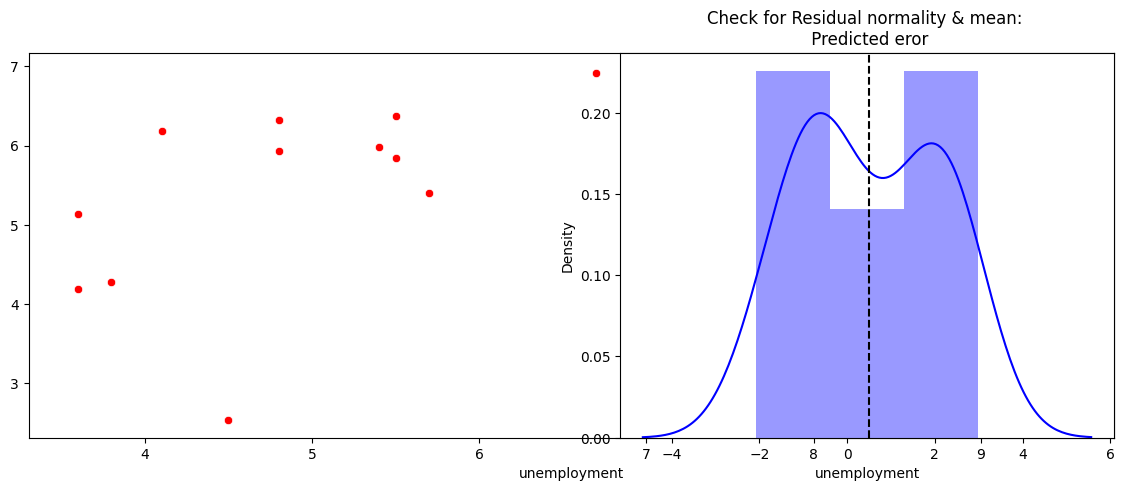

In [166]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


# ax.set_title('Check for Linearity:\n Unemployed Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Predicted eror');

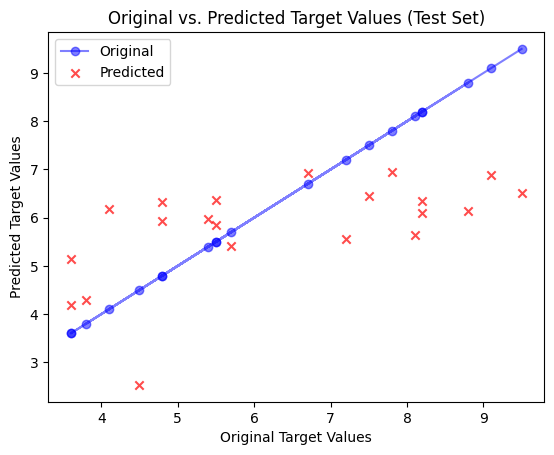

In [174]:
# Plot the original vs. predicted values for the test set
plt.plot(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, y_pred_sk, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_9_'></a>[Multivariate Normality and Homoscedasticity](#toc0_)

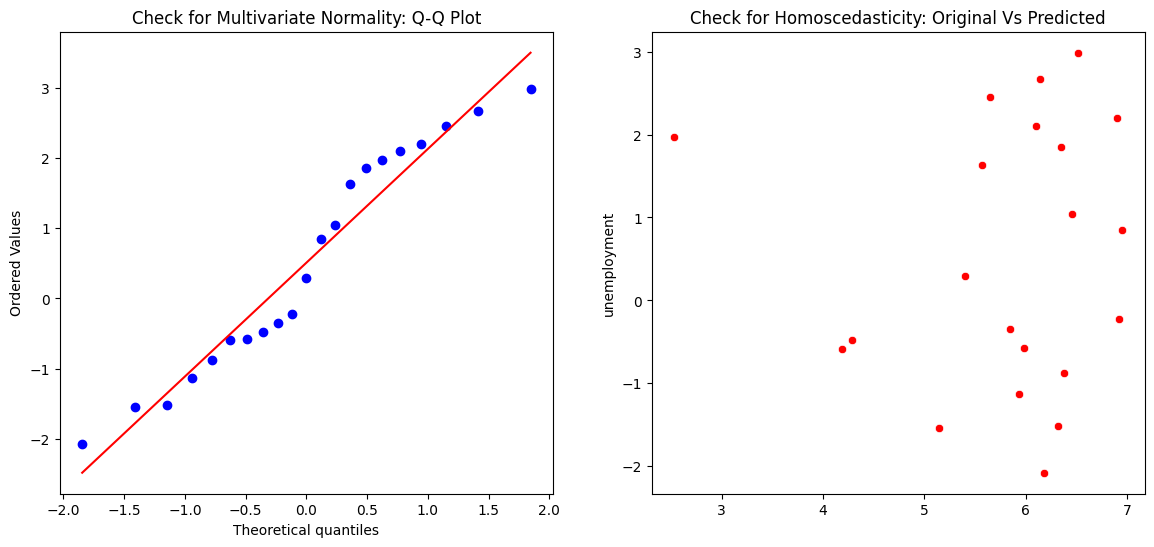

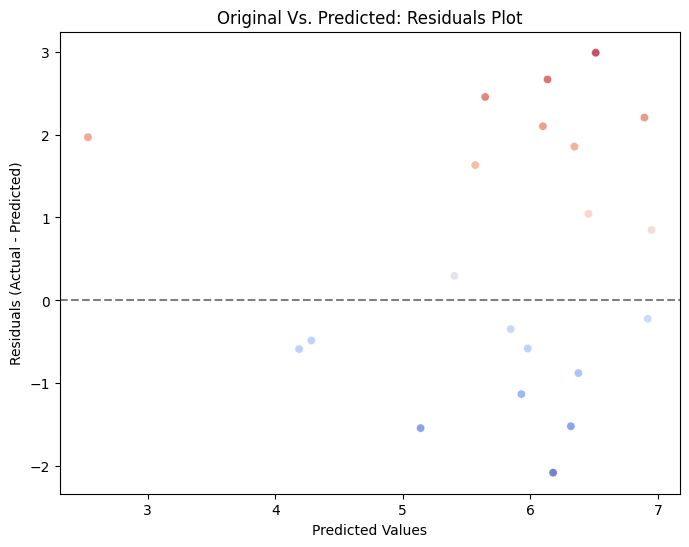

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: Q-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: Original Vs Predicted');

# Calculate the residuals
residuals = y_test - y_pred_sk

# Create the plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(y=residuals, x=y_pred_sk, hue=residuals, palette='coolwarm', alpha=0.7)
plt.axhline(0, color='gray', linestyle='dashed')  # Add a dashed line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Original Vs. Predicted: Residuals Plot')
plt.legend().set_visible(False)  # Hide the legend
plt.show()

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

1.3611305220008818

### <a id='toc1_2_10_'></a>[r2 score and mean squared error](#toc0_)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: 0.26531659981440625
Mean Squared Error (MSE): 2.6346979532732795


### <a id='toc1_2_11_'></a>[Linear Regression - Univeriant](#toc0_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data (mandatory for PCA)
scaler = StandardScaler()

unemployment = final_df['unemployment']
uv_df = final_df.drop('unemployment',axis=1) # Independet variable
df_cols = uv_df.columns

X_std = scaler.fit_transform(final_df[df_cols])

# print(X_std)

# Apply PCA to reduce the dimensionality to 1 component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_std)

# Add the reduced component as a new column in the DataFrame
univariant_df = pd.DataFrame()
univariant_df['target'] = unemployment
univariant_df['combined_feature'] = X_pca

# Step 5: Perform univariate linear regression to predict the 'target'
X = univariant_df['combined_feature'].values.reshape(-1, 1)
y = univariant_df['target'].values

In [ ]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Perform univariate linear regression to predict the 'target'
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 7: Calculate the cost function (mean squared error) for the model's predictions on the test set.
predictions = regressor.predict(X_test)
cost_function = mean_squared_error(y_test, predictions)

print("Cost function (Mean Squared Error) on the test set:", cost_function)

Cost function (Mean Squared Error) on the test set: 8.28157643263393


ValueError: x and y must be the same size

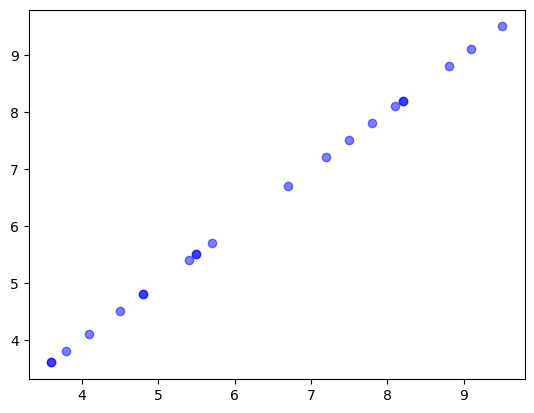

In [172]:
# Plot the original vs. predicted values for the test set
plt.scatter(y_test, y_test, c='blue', label='Original', marker='o', alpha=0.5)
plt.scatter(y_test, predictions, c='red', label='Predicted', marker='x', alpha=0.7)
plt.xlabel('Original Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Original vs. Predicted Target Values (Test Set)')
plt.legend()
plt.show()

### <a id='toc1_2_12_'></a>[SVR (Support Vector Regression)](#toc0_)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
# Standardize the features (optional but can improve model performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)

R-squared (R2): 0.33676178100624254
Mean Squared Error (MSE): 2.3784835449855493
